<a href="https://colab.research.google.com/github/KVenkataPavani/Swiggy-Insights-Restaurant-Data-Analysis/blob/main/Swiggy_Insights_Restaurant_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Swiggy Data Analysis


#**Importing Libraries**


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#**Loading Data**


In [55]:
# Load the dataset
df = pd.read_csv("swiggy.csv")
df

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
...,...,...,...,...,...,...,...,...,...,...
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28


#**Exploring Data**


In [56]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [57]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [58]:
df.tail()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28
8679,466488,Navrangpura,Ahmedabad,Sassy Street,250.0,2.9,80,"Chaat,Snacks,Chinese",Navrangpura,44


#**Data Preprocessing**


In [59]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n")
missing_values

Missing values in each column:



,0
ID,0
Area,0
City,0
Restaurant,0
Price,0
Avg ratings,0
Total ratings,0
Food type,0
Address,0
Delivery time,0


In [60]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:")
duplicates

Number of duplicate rows:


0

In [61]:
# Summary statistics
descriptive_stats = df.describe()
print("Descriptive Statistics:\n")
descriptive_stats

Descriptive Statistics:



,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


#**Exploratory Analysis**


###**Restaurant Distribution**


##**How many cities does Swiggy serve?**


In [37]:
print("\nNumber of unique cities served :")
df.City.nunique()


Number of unique cities served :


9

##**Total no of restaurants within Swiggy's purview?**

In [38]:
print("Total number of restaurants:")
df.shape[0]

Total number of restaurants:


8680

##**Unique restaurant Count in Swiggy**

In [41]:
print("Unique restaurant names:")
df.Restaurant.nunique()


Unique restaurant names:


7865

In [42]:
popular_restaurants = df.Restaurant.value_counts().head(25)
print("Most popular food chains:\n")
popular_restaurants

Most popular food chains:



,count
Restaurant,
La Pino'Z Pizza,13
Nic Natural Ice Creams,10
Baskin Robbins,10
Subway,10
Kfc,9
Keventers - Milkshakes And Desserts,9
Oven Story Pizza,9
Natural Ice Cream,9
Pizza Hut,9


In [63]:
df["Avg ratings"].value_counts()

,count
Avg ratings,
2.9,3279
4.3,792
4.2,754
4.1,700
4.4,573
4.0,524
3.9,421
4.5,338
3.8,313


In [65]:
df["Avg ratings"].value_counts().sort_index()

,count
Avg ratings,
2.0,1
2.2,3
2.3,1
2.4,1
2.5,1
2.6,2
2.7,11
2.8,15
2.9,3279


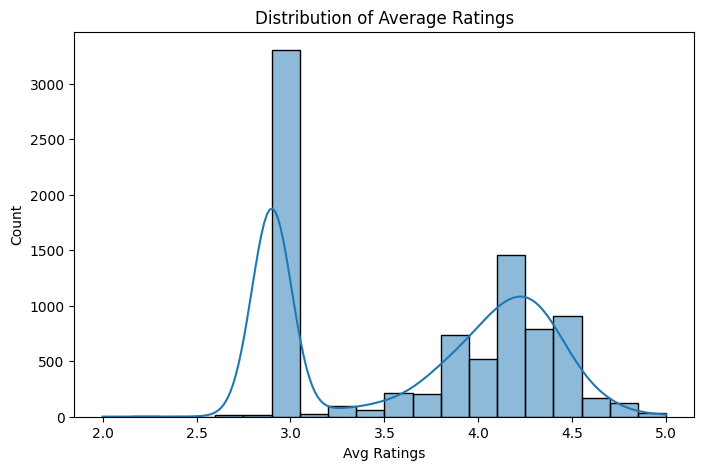

In [66]:
# Customer Reviews Analysis
plt.figure(figsize=(8,5))
sns.histplot(df['Avg ratings'], bins=20, kde=True)
plt.title("Distribution of Average Ratings")
plt.xlabel("Avg Ratings")
plt.ylabel("Count")
plt.show()

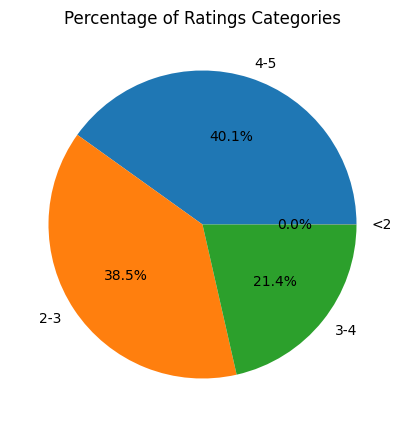

In [67]:
# Percentage of Ratings Categories
rating_bins = [0, 2, 3, 4, 5]
rating_labels = ['<2', '2-3', '3-4', '4-5']
df['Rating Category'] = pd.cut(df['Avg ratings'], bins=rating_bins, labels=rating_labels, include_lowest=True)
plt.figure(figsize=(8,5))
df['Rating Category'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title("Percentage of Ratings Categories")
plt.ylabel("")
plt.show()

###**Which city had the most restaurants?**
###**Top 10 cities with the most restaurants**



In [71]:
df.groupby(['City'])['ID'].nunique().sort_values(ascending=False).head(10)


,ID
City,
Kolkata,1346
Mumbai,1277
Chennai,1106
Pune,1090
Hyderabad,1075
Bangalore,946
Ahmedabad,717
Delhi,611
Surat,512


###**Which city has the best food?**

In [19]:
city_avg_ratings = df.groupby('City')['Avg ratings'].mean().sort_values(ascending=False).head(10)
print("Top 10 cities with highest average ratings:\n", city_avg_ratings)

Top 10 cities with highest average ratings:
 City
Chennai      3.776311
Bangalore    3.762896
Hyderabad    3.701395
Kolkata      3.698811
Mumbai       3.599374
Ahmedabad    3.596513
Surat        3.580078
Pune         3.550183
Delhi        3.526350
Name: Avg ratings, dtype: float64


In [76]:
# Identify the city with the best food based on highest average rating
best_food_city = city_avg_ratings.idxmax()
best_food_rating = city_avg_ratings.max()
print(f"The city with the best food is {best_food_city} with an average rating of {best_food_rating:.2f}.")

The city with the best food is Chennai with an average rating of 3.78.


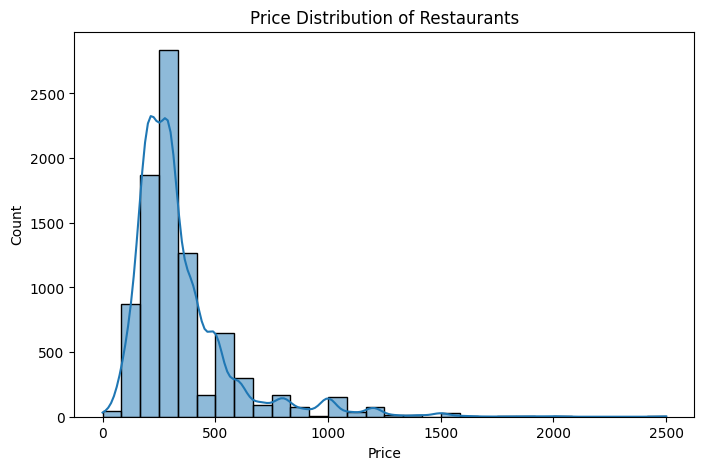

In [77]:
# Cost Analysis
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Price Distribution of Restaurants")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [85]:
most_expensive = df.sort_values(by='Price', ascending=False).head(10)
print("Most expensive restaurants:\n")
most_expensive[['City','Restaurant', 'Price']]

Most expensive restaurants:



,City,Restaurant,Price
3079,Chennai,Malgudi - The Savera Hotel,2500.0
2934,Bangalore,Itc Windsor - Gourmet Couch,2500.0
4718,Mumbai,Origami Japanese & Korean Restaurant,2500.0
1377,Mumbai,Cafe Delhi Heights,2000.0
8485,Bangalore,Lubov Patisserie By Frozen Bottle,2000.0
2782,Pune,Conrad Pune,2000.0
2757,Mumbai,Yauatcha,2000.0
2352,Mumbai,Pukhtaan,1900.0
800,Chennai,Chin Chin - The Residency,1900.0
5810,Mumbai,Sante Spa Cuisine,1900.0


#**Top 10 most common cuisines**

In [87]:
# Cuisine Popularity
cuisine_counts = df['Food type'].str.split(',').explode().value_counts().head(20)
print("Top 10 most common cuisines:\n")
cuisine_counts

Top 10 most common cuisines:



,count
Food type,
Chinese,2588
North Indian,1921
Indian,1772
Fast Food,1550
Beverages,1524
Desserts,1436
Biryani,1079
Snacks,1013
South Indian,857


#**Top 10 cuisines among highly rated restaurants:**

In [88]:
# Cuisine Analysis for Highly Rated Restaurants
highly_rated_cuisines = df[df['Avg ratings'] > 3.5]['Food type'].str.split(',').explode().value_counts().head(10)
print("Top 10 cuisines among highly rated restaurants:\n")
highly_rated_cuisines

Top 10 cuisines among highly rated restaurants:



,count
Food type,
Chinese,1563
North Indian,1327
Desserts,979
Indian,952
Beverages,889
Fast Food,866
Biryani,687
South Indian,663
Snacks,572
